# Vergleich der FFT mit SciPy und CMSIS-DSP

In [38]:
import numpy as np
import matplotlib.pyplot as plt

import cmsisdsp as dsp
import scipy


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

!python --version
print("SciPy: " + scipy.__version__)
print("CMSIS-DSP: " + dsp.__version__)

Python 3.11.12
SciPy: 1.15.2
CMSIS-DSP: 1.10.2


In [3]:
samplingFreq = 1620    # Abtastfrequenz in Hertz
bufferSize   = 512     # Blockgröße eines Buffers

### Erzeugung Testsignal

In [27]:
T = 1/samplingFreq
N = bufferSize

x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.cos(150 * 2*np.pi * x)

Text(0, 0.5, 'Amplitude')

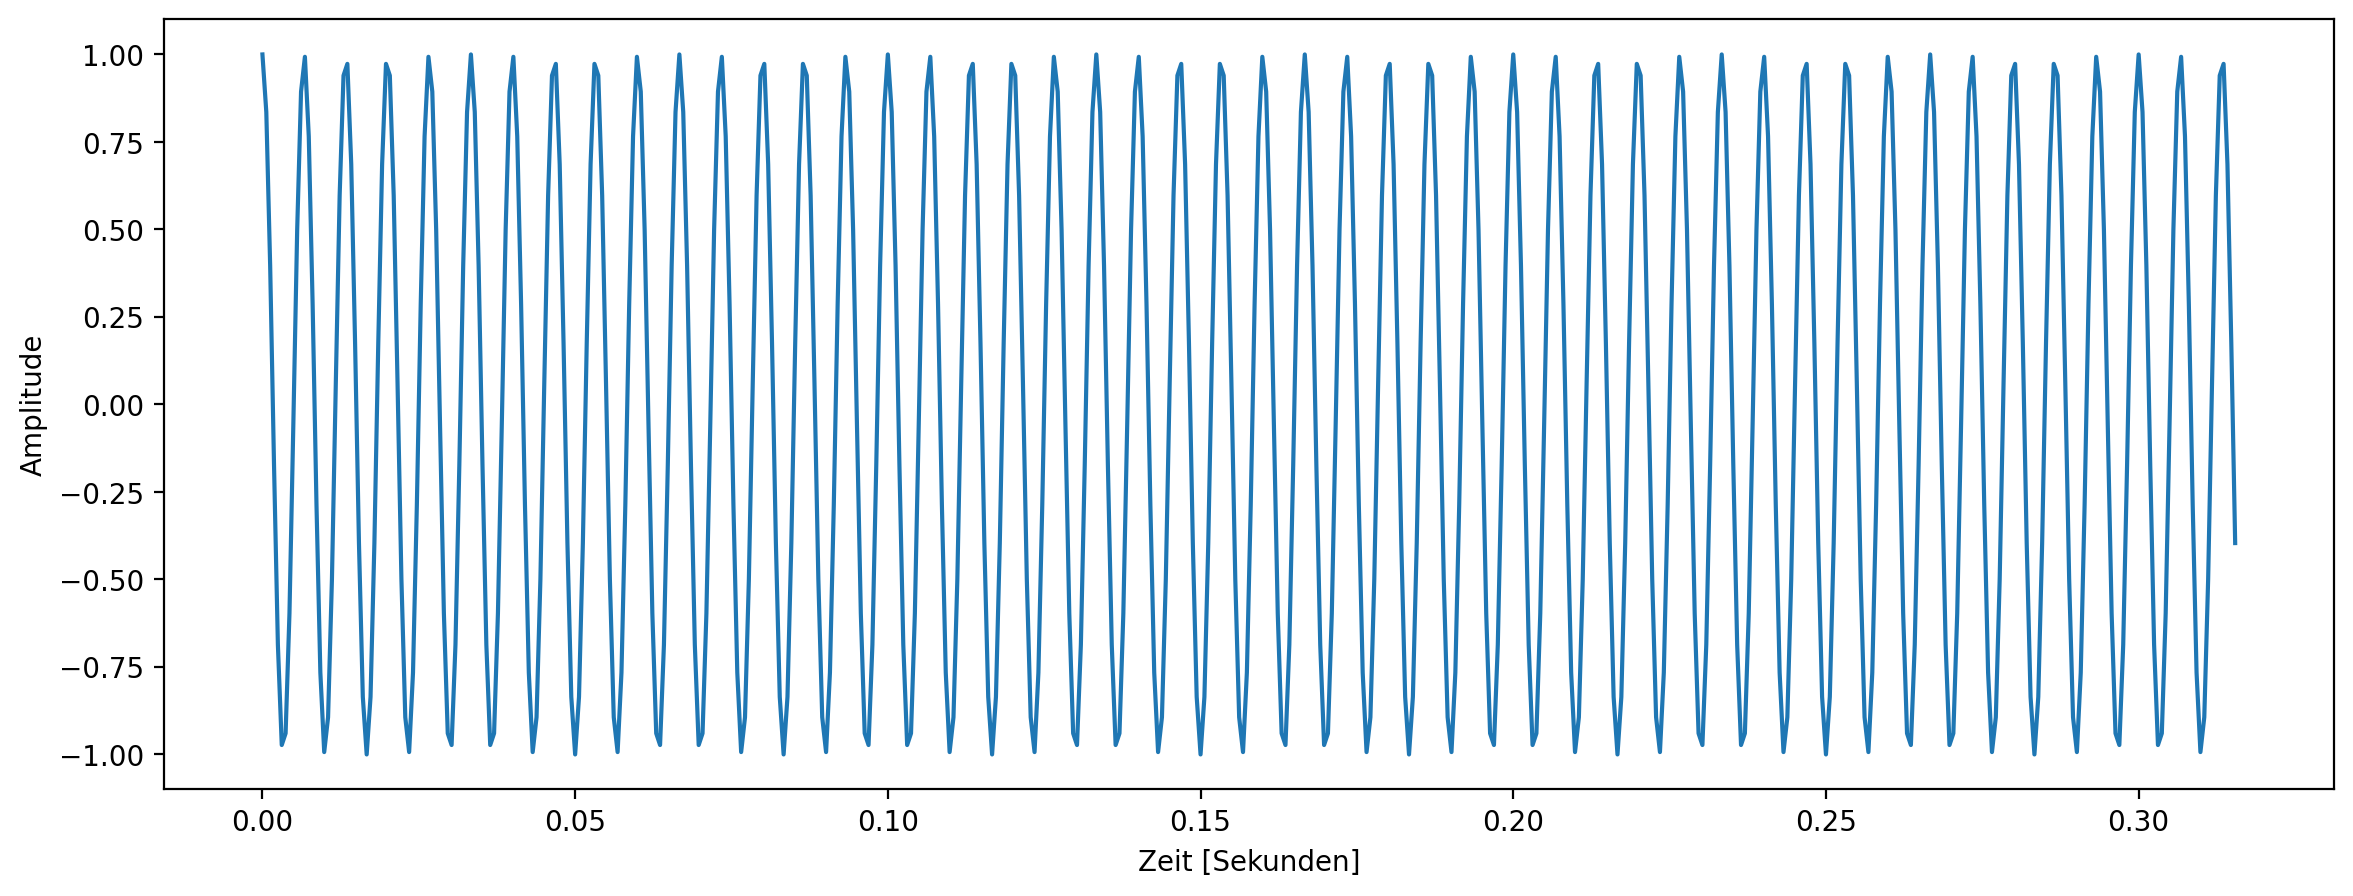

In [28]:
plt.figure(figsize=(14,5))
plt.plot(x, y)
plt.xlabel('Zeit [Sekunden]')
plt.ylabel('Amplitude')

### FFT mit SciPy

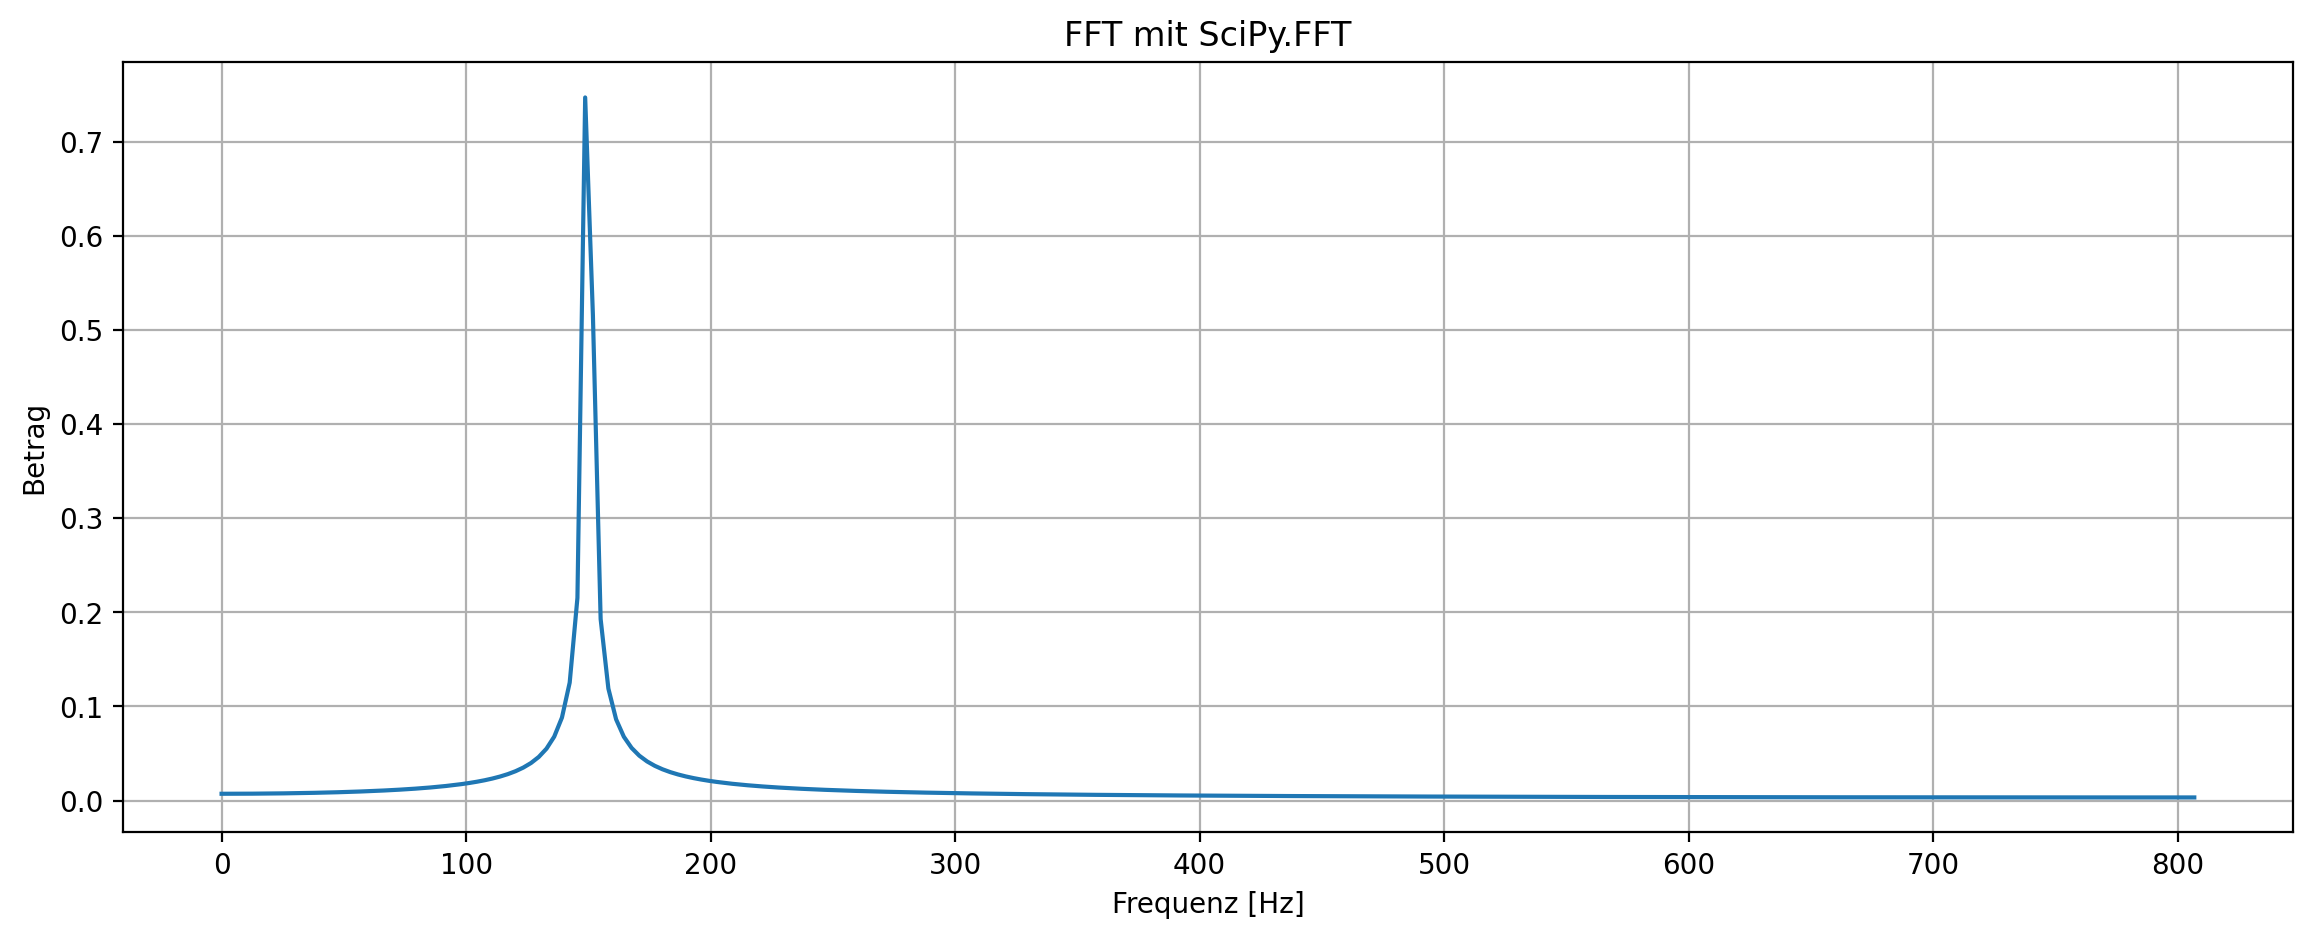

In [36]:
window = np.hamming(N)  # Hamming-Fensterfunktion

Y     = scipy.fft.fft(y)
freq_ = scipy.fft.fftfreq(N, T)[:N//2]

Y_fft = 2.0/N * np.abs(Y[0:N//2])

plt.figure(figsize=(14,5))
plt.plot(freq_, Y_fft)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Betrag')
plt.title('FFT mit SciPy.FFT')
plt.grid()

### FFT mit CMSIS-DSP

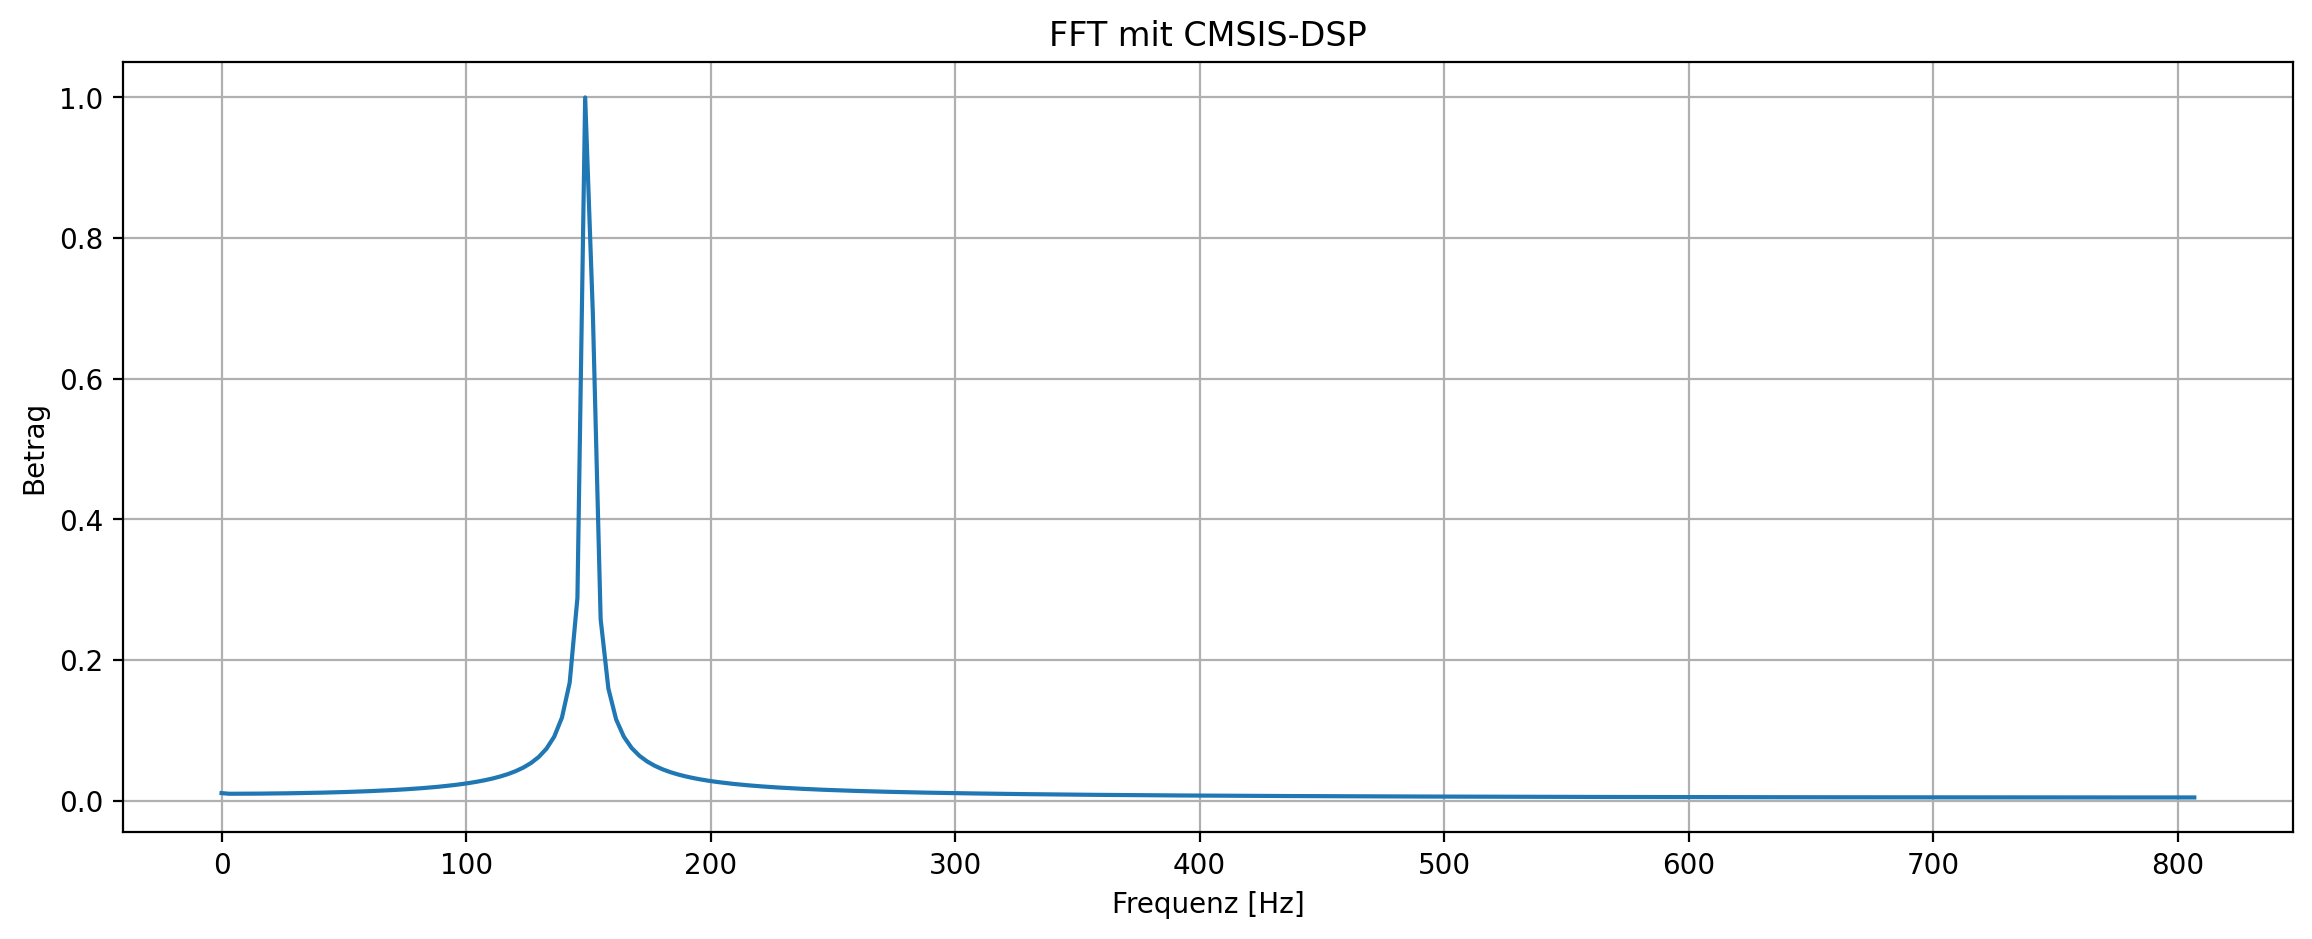

In [37]:
rfftf32 = dsp.arm_rfft_fast_instance_f32()
status  = dsp.arm_rfft_fast_init_f32(rfftf32, 512)

Y_cmsis = dsp.arm_rfft_fast_f32(rfftf32, y, 0)
Y_fft_cmsis = dsp.arm_cmplx_mag_f32(Y_cmsis)

maxValue = dsp.arm_max_f32(Y_fft_cmsis)    # find max value
Y_fft_cmsis = Y_fft_cmsis/maxValue[0]      # normalize vector

# Plot
plt.figure(figsize=(14,5))
plt.plot(freq_, Y_fft_cmsis)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Betrag')
plt.title('FFT mit CMSIS-DSP')
plt.grid()